In [1]:
%cd ~/code/projects/paegan-pytorch/
import torch
import my_utils
from models import PAEGAN

/home/ira/code/projects/paegan-pytorch


In [3]:
net = PAEGAN().cuda()
net.load_state_dict(torch.load('torch_experiments/two-bb-hack/network/paegan_epoch_56.pth'))
sim_config = torch.load(open('torch_experiments/_datasets/two-bb/train.conf', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'torch_experiments/_datasets/two-bb/train.conf'

Uninformative baseline level at 0.02359461970627308


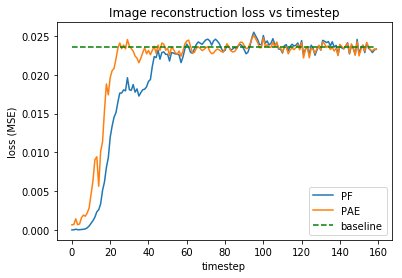

/home/ira/code/envs/flexi/lib/python3.5/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float32 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
/home/ira/code/envs/flexi/lib/python3.5/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


In [22]:
my_utils.pf_multi_run_plot(net, sim_config, runs=1, p_mask=1.0, n_particles=300)